In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.shape)
print(test_data.shape)

(4209, 378)
(4209, 377)


In [3]:
for i in train_data.columns:
    data_type = train_data[i].dtype
    if data_type == 'object':
        print(i)

X0
X1
X2
X3
X4
X5
X6
X8


In [4]:
train_data =train_data.drop(columns ={'X11','X93','X107','X233','X235','X268',
                                      'X289','X290','X293','X297','X330','X347'})
train_data.shape

(4209, 366)

In [5]:
train_data.isnull().sum().any()

False

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
train_data_feature = train_data.drop(columns ={'y','ID'})
train_data_target = train_data.y
print(train_data_feature.shape)
print (train_data_target.shape)

(4209, 364)
(4209,)


In [8]:
train_data_feature.describe(include= 'object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [9]:
train_data_feature['X0'] = le.fit_transform(train_data_feature.X0)
train_data_feature['X1'] = le.fit_transform(train_data_feature.X1)
train_data_feature['X2'] = le.fit_transform(train_data_feature.X2)
train_data_feature['X3'] = le.fit_transform(train_data_feature.X3)
train_data_feature['X4'] = le.fit_transform(train_data_feature.X4)
train_data_feature['X5'] = le.fit_transform(train_data_feature.X5)
train_data_feature['X6'] = le.fit_transform(train_data_feature.X6)
train_data_feature['X8'] = le.fit_transform(train_data_feature.X8)

In [10]:
print(train_data_feature.shape)
print(train_data_target.shape)

(4209, 364)
(4209,)


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)

In [12]:
pca.fit(train_data_feature,train_data_target)

PCA(n_components=0.95)

In [13]:
train_data_feature_trans =pca.fit_transform(train_data_feature)
print (train_data_feature_trans.shape)

(4209, 6)


In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [15]:
train_x,test_x,train_y,test_y = train_test_split(train_data_feature_trans,train_data_target,test_size = .3,random_state= 1)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2946, 6)
(2946,)
(1263, 6)
(1263,)


In [16]:
xgb_reg = xgb.XGBRegressor(objective = 'reg:linear' , colsample_bytree = 0.3, learning_rate= 0.4, max_depth = 10, alpha =6,n_estimator = 20)
model = xgb_reg.fit(train_x,train_y)
print('RMSE = ',sqrt(mean_squared_error(model.predict(test_x),test_y)))

RMSE =  11.976925574198583


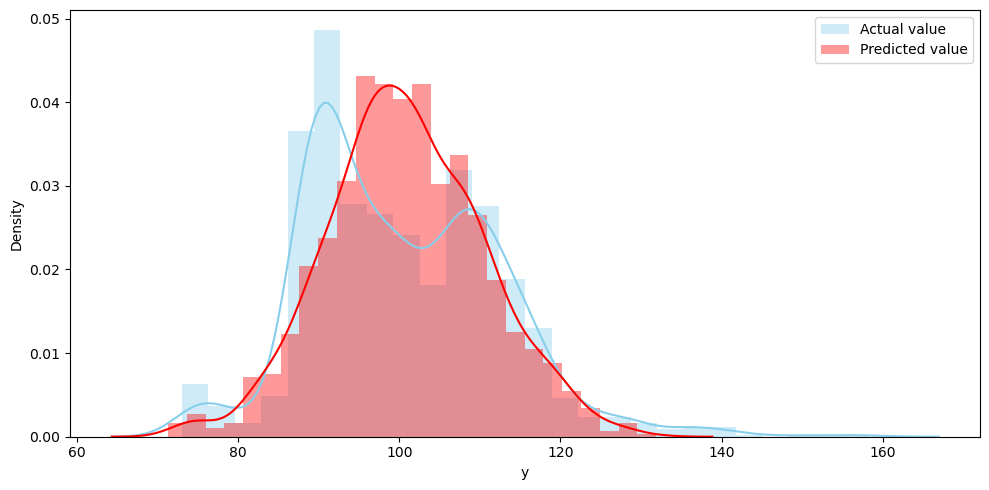

In [17]:
pred_test_y = model.predict(test_x)

plt.figure(figsize =(10,5))

sns.distplot(test_y[test_y<160],color = 'skyblue',label = 'Actual value')
sns.distplot(pred_test_y[pred_test_y<160], color = 'red',label ='Predicted value')
plt.legend()

plt.tight_layout()

In [18]:
dmatrix_train = xgb.DMatrix(data=train_data_feature_trans,label=train_data_target)

params = {'objective':'reg:linear', 'colsample_bytree': 0.3,
          'learning_rate': 0.3, 'max_depth': 5, 'alpha': 10}

model_cv = xgb.cv(dtrain=dmatrix_train, params=params, nfold=3, 
                  num_boost_round=50, early_stopping_rounds=10, 
                      metrics="rmse", as_pandas=True, seed=7)
model_cv.tail(4)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
27,9.837710,0.330378,11.021674,0.755608
28,9.791858,0.330173,11.022402,0.747930
29,9.711556,0.338250,10.973610,0.745482
30,9.687566,0.336480,10.967618,0.747471


In [19]:
test_data = test_data.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})
test_data.shape

(4209, 365)

In [20]:
test_data.isnull().sum().any()

False

In [21]:
test_data_feature = test_data.drop(columns={'ID'})
print(test_data_feature.shape)

(4209, 364)


In [22]:
test_data_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [23]:
test_data_feature['X0'] = le.fit_transform(test_data_feature.X0)
test_data_feature['X1'] = le.fit_transform(test_data_feature.X1)
test_data_feature['X2'] = le.fit_transform(test_data_feature.X2)
test_data_feature['X3'] = le.fit_transform(test_data_feature.X3)
test_data_feature['X4'] = le.fit_transform(test_data_feature.X4)
test_data_feature['X5'] = le.fit_transform(test_data_feature.X5)
test_data_feature['X6'] = le.fit_transform(test_data_feature.X6)
test_data_feature['X8'] = le.fit_transform(test_data_feature.X8)

In [24]:
pca.fit(test_data_feature)

PCA(n_components=0.95)

In [25]:
test_data_feature_trans = pca.fit_transform(test_data_feature)
print(test_data_feature_trans.shape)

(4209, 6)


In [26]:
test_pred = model.predict(test_data_feature_trans)
test_pred

array([ 83.44011, 111.93969, 109.11988, ...,  92.38511, 128.68633,
       102.12851], dtype=float32)

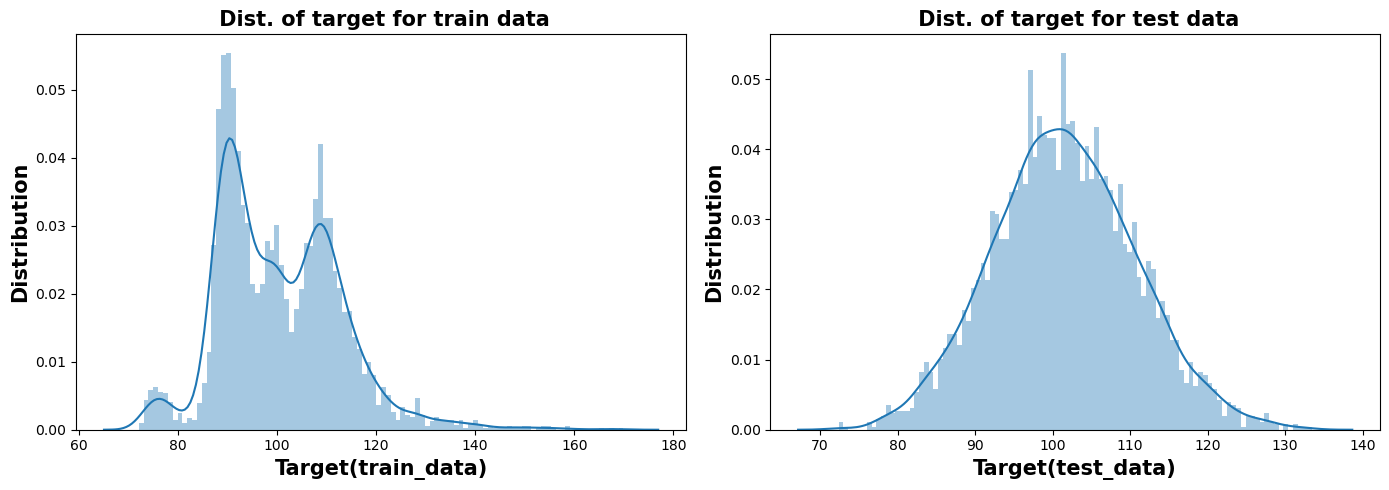

In [27]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

train_plot = sns.distplot(train_data_target[train_data_target<200], bins=100, kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_data)', weight='bold', size=15)
train_plot.set_ylabel('Distribution', weight='bold', size=15)
train_plot.set_title(' Dist. of target for train data', weight='bold', size=15)

test_plot = sns.distplot(test_pred[test_pred<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(test_data)', weight='bold', size=15)
test_plot.set_ylabel('Distribution', weight='bold', size=15)
test_plot.set_title(' Dist. of target for test data', weight='bold', size=15)

plt.tight_layout()